In [1]:
from fastai import *
from fastai.vision import *

In [2]:
defaults.device = torch.device("cuda")

In [3]:
folder = 'bedroom'
file = 'url_bedroom.txt'

In [4]:
folder = 'livingroom'
file = 'url_livingroom.txt'

In [5]:
folder = 'kitchen'
file = 'url_kitchen.txt'

In [6]:
folder = 'office'
file = 'url_office.txt'

In [7]:
folder = 'bathroom'
file = 'url_bathroom.txt'

In [8]:
path = Path('data/rooms')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
path.ls()


[PosixPath('data/rooms/models'),
 PosixPath('data/rooms/url_office.txt'),
 PosixPath('data/rooms/bathroom'),
 PosixPath('data/rooms/livingroom'),
 PosixPath('data/rooms/export.pkl'),
 PosixPath('data/rooms/bedroom'),
 PosixPath('data/rooms/url_bedroom.txt'),
 PosixPath('data/rooms/url_livingroom.txt'),
 PosixPath('data/rooms/cleaned.csv'),
 PosixPath('data/rooms/kitchen'),
 PosixPath('data/rooms/url_bathroom.txt'),
 PosixPath('data/rooms/url_kitchen.txt'),
 PosixPath('data/rooms/office')]

In [11]:
classes = ['kitchen', 'bedroom', 'bathroom', 'livingroom', 'office']

In [10]:
download_images(path/file, dest, max_pics=200)

Error http://www.homeybathroom.com/wp-content/uploads/2014/01/Bathroom-Rendering-.jpg HTTPConnectionPool(host='www.homeybathroom.com', port=80): Max retries exceeded with url: /wp-content/uploads/2014/01/Bathroom-Rendering-.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f37683a02b0>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://cdn.freshome.com/wp-content/uploads/2015/05/smallbath7.jpg HTTPSConnectionPool(host='cdn.freshome.com', port=443): Max retries exceeded with url: /wp-content/uploads/2015/05/smallbath7.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f376839e390>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://www.evmatch.co/attachment/full/interior-design-apartment-bathroom/home-design--layout-apartment-compact-extraordinary-small-design-13.jpg HTTPSConnectionPool(host='www.evmatch.co', port=443): Read timed o

In [49]:
download_images(path/file, dest, max_pics=200, max_workers=0)

Error https://www.costco.ca/wcsstore/CostcoCABCCatalogAssetStore/category-tiles/bedroom-amalia.jpg HTTPSConnectionPool(host='www.costco.ca', port=443): Read timed out. (read timeout=4)
Error https://www.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/category-tiles/bedroom-collections.jpg HTTPSConnectionPool(host='www.costco.com', port=443): Read timed out. (read timeout=4)
Error https://www.homedepot.ca/content/dam/homedepot/images/shop-by-room/bedroom/br-intro-810x405.jpg HTTPSConnectionPool(host='www.homedepot.ca', port=443): Read timed out. (read timeout=4)
Error https://www.costco.ca/wcsstore/CostcoCABCCatalogAssetStore/category-tiles/bedroom-aurora.jpg HTTPSConnectionPool(host='www.costco.ca', port=443): Read timed out. (read timeout=4)
Error https://www.costco.ca/wcsstore/CostcoCABCCatalogAssetStore/category-tiles/bedroom-furniture-beds.jpg HTTPSConnectionPool(host='www.costco.ca', port=443): Read timed out. (read timeout=4)
Error https://www.homedepot.ca/content/dam/homedepot/i

In [12]:
for c in classes:
    print(c)
#     print(path/c)
    verify_images(path/c, delete=True, max_size=500)

kitchen


bedroom


bathroom


livingroom


office


In [13]:
doc(get_transforms)

In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)



In [55]:
doc(ImageDataBunch.from_csv)

In [14]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv', ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['bathroom', 'bedroom', 'kitchen', 'livingroom', 'office']

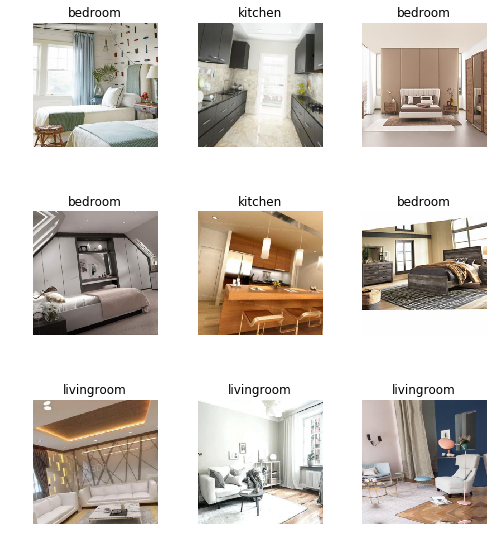

In [16]:
data.show_batch(rows=3, figsize=(7, 8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bathroom', 'bedroom', 'kitchen', 'livingroom', 'office'], 5, 549, 137)

In [17]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [18]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-03


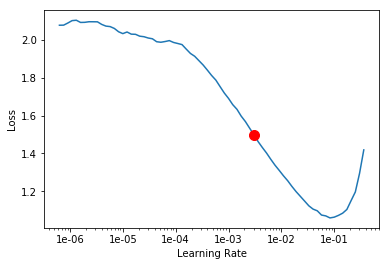

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(4, max_lr=slice(5e-4, 1e-2))


epoch,train_loss,valid_loss,error_rate
1,1.178115,1.825089,0.401460
2,0.832422,0.675968,0.189781
3,0.650844,0.287067,0.124088
4,0.524399,0.247251,0.116788


In [21]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-3))

epoch,train_loss,valid_loss,error_rate
1,1.762626,0.714116,0.225275
2,1.190374,0.439642,0.170330
3,0.926519,0.431575,0.153846
4,0.766321,0.429730,0.153846


In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.744212,1.001222,0.452555
2,1.262228,0.463981,0.189781
3,0.972350,0.414933,0.153285
4,0.817102,0.412630,0.153285


Min numerical gradient: 9.95E-03


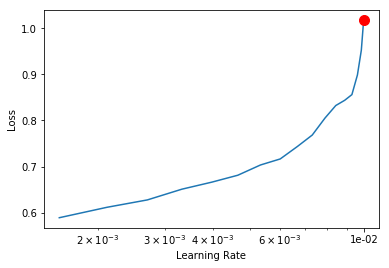

In [25]:
learn.recorder.plot()

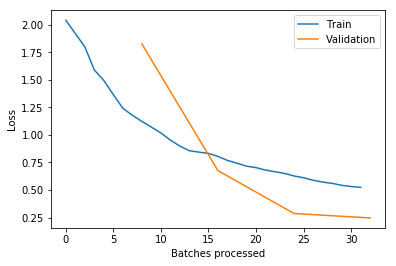

In [26]:
learn.recorder.plot_losses()

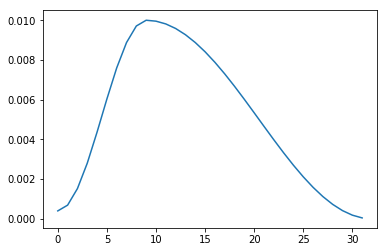

In [27]:
learn.recorder.plot_lr()

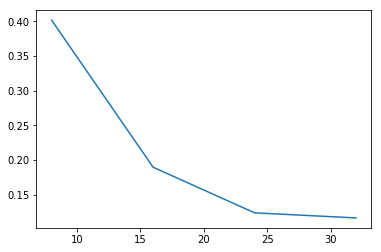

In [28]:
learn.recorder.plot_metrics()

In [29]:
learn.save('stage-1')

In [30]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (549 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bathroom,bathroom,bathroom,bathroom,bathroom
Path: data/rooms;

Valid: LabelList (137 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bedroom,office,livingroom,bedroom,bedroom
Path: data/rooms;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [31]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06


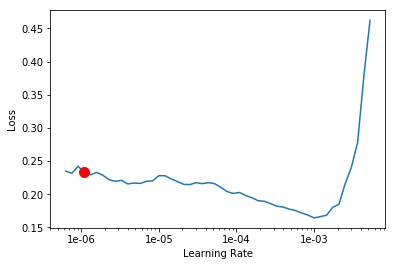

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.242026,0.243679,0.094891
2,0.211888,0.226788,0.094891
3,0.189777,0.224696,0.087591
4,0.167790,0.220039,0.080292
5,0.154404,0.217052,0.072993
6,0.138954,0.218372,0.080292


In [37]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.083817,0.210793,0.072993
2,0.087190,0.209833,0.087591
3,0.074807,0.197174,0.087591
4,0.071415,0.187674,0.087591
5,0.065617,0.187388,0.094891
6,0.063086,0.190112,0.087591


In [30]:
learn.fit_one_cycle(6, max_lr=slice(5e-6, 5e-4))

epoch,train_loss,valid_loss,error_rate
1,0.249124,0.305496,0.080292
2,0.257813,0.237506,0.080292
3,0.199846,0.204082,0.087591
4,0.167774,0.199289,0.072993
5,0.148314,0.205887,0.080292
6,0.132656,0.203934,0.072993


In [25]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.302947,0.289865,0.087591
2,0.246968,0.233579,0.080292
3,0.195276,0.269432,0.102190
4,0.164282,0.245198,0.087591
5,0.135747,0.228078,0.094891
6,0.122730,0.227428,0.102190


Min numerical gradient: 7.63E-05


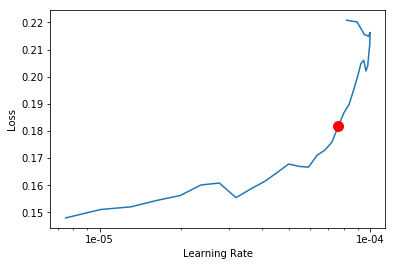

In [35]:
learn.recorder.plot()

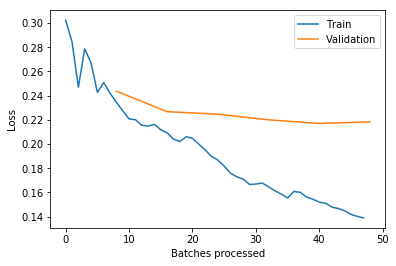

In [36]:
learn.recorder.plot_losses()

In [39]:
learn.save('stage-2')

In [40]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (549 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bathroom,bathroom,bathroom,bathroom,bathroom
Path: data/rooms;

Valid: LabelList (137 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bedroom,office,livingroom,bedroom,bedroom
Path: data/rooms;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

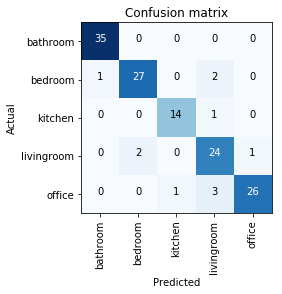

In [42]:
interp.plot_confusion_matrix()

In [43]:
interp.most_confused(min_val=2)

[('office', 'livingroom', 3)]

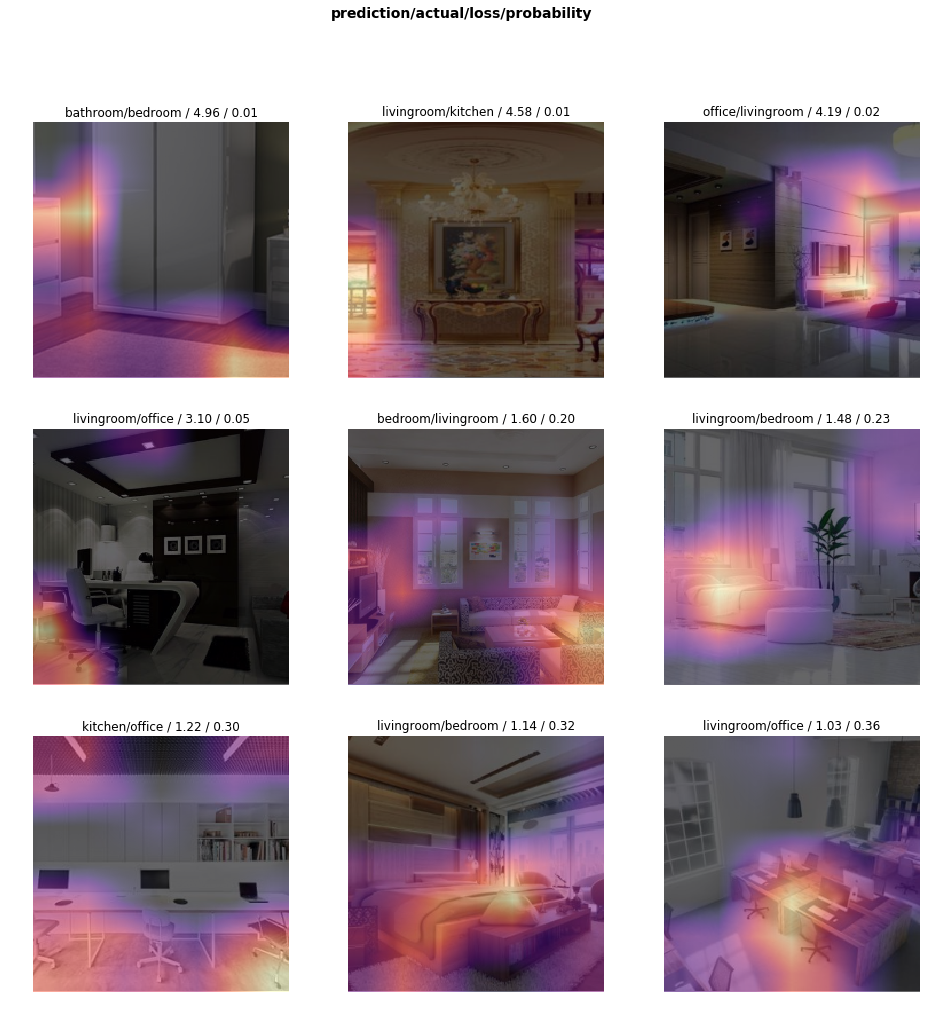

In [44]:
interp.plot_top_losses(9, figsize=(16,16))

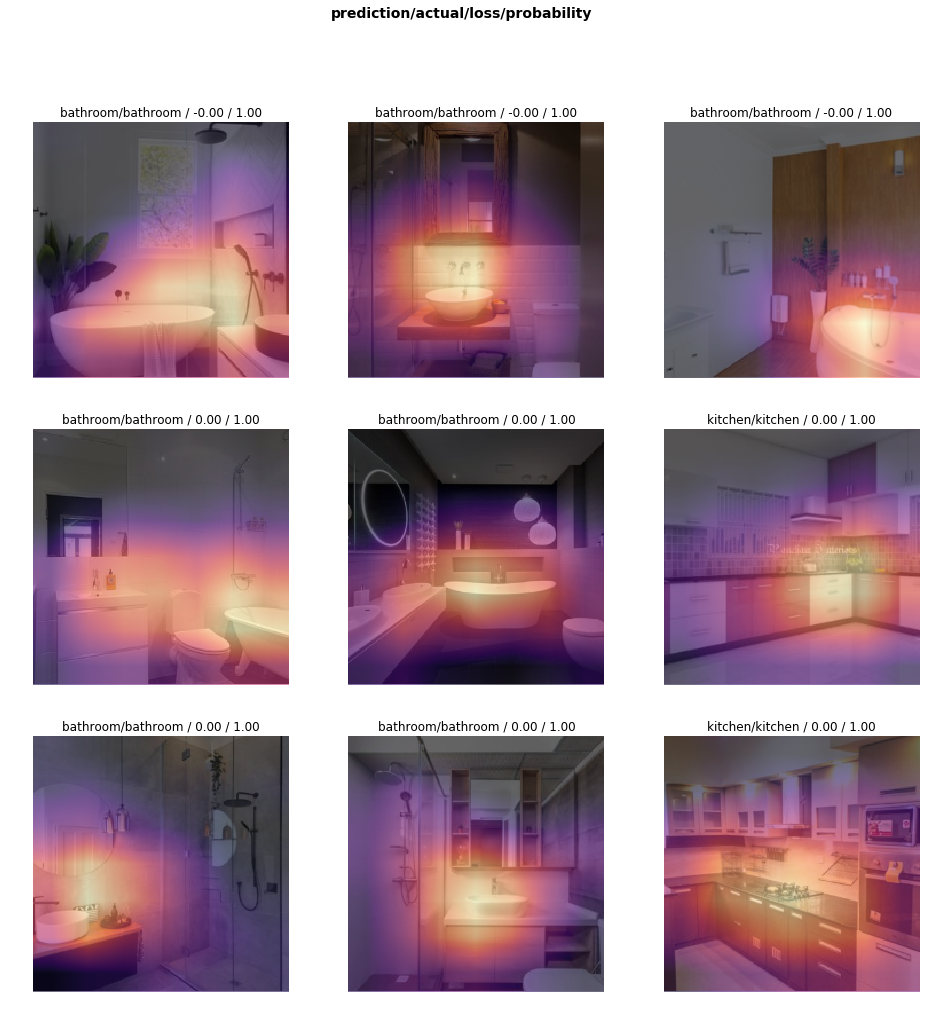

In [76]:
interp.plot_top_losses(9, largest=False, figsize=(16,16))

In [77]:
# Clean up

In [34]:
from fastai.widgets import *

In [35]:
losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

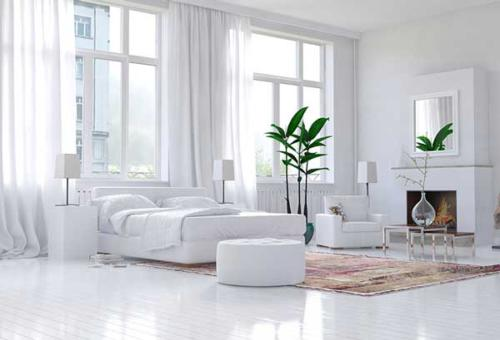

In [36]:
top_loss_paths[0]

In [44]:
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=32)

In [38]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid, n_imgs=32)

In [39]:
len(idxs), idxs

(32,
 tensor([113, 461, 220, 538, 522, 172, 164, 472, 197, 469, 489, 483, 499, 509,
         171, 229, 116, 178, 481, 465, 121, 547, 473, 482, 531, 460, 488, 202,
         182, 239, 396, 105]))

In [40]:
print(ds)

LabelList (549 items)
x: ImageItemList
Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300),Image (3, 250, 300)
y: CategoryList
bathroom,bathroom,bathroom,bathroom,bathroom
Path: data/rooms


In [53]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [45]:
doc(ImageCleaner)

In [48]:
ds, idxs = DatasetFormatter().from_similars(learn, layer_ls=[0, 5, 2])

Getting activations...


Computing similarities...


In [41]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [63]:
doc(DatasetType)

In [49]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [42]:
# Production

In [45]:
learn.export()

In [46]:
defaults.device = torch.device("cpu")

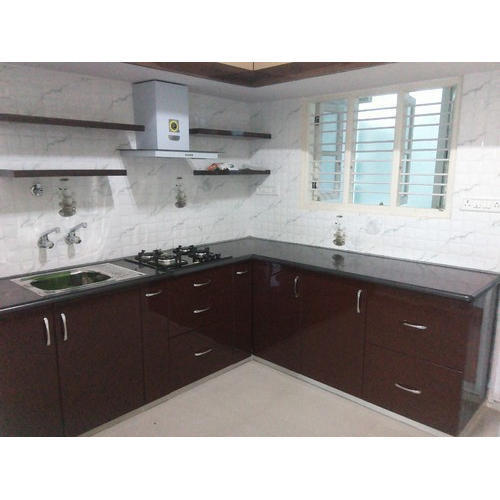

In [47]:
img = open_image(path/'kitchen'/'00000004.jpg')
img

In [48]:
learn = load_learner(path)

In [49]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category kitchen